## **Lineer Kongruans Yöntemi (LCG) ile Rastgele Sayı Üretimi ve Histogram Çizimi**

Bu hücre, Lineer Kongruans Yöntemi (LCG) kullanarak [0,1] aralığında rastgele sayılar üretir ve bunların histogramını çizer.

### **LCG Parametreleri:**
- $ a = 75 $ → Çarpan (Multiplier)
- $ c = 0 $ → Kaydırma (Increment) (Burada 0 olduğu için Multiplicative LCG kullanılıyor)
- $ m = 2^{31} - 1 $ → Modulus (Mersenne Prime, 2,147,483,647)
- $ \text{Çekirdek} = 42 $ → Başlangıç değeri (Seed)

### **Algoritma Açıklaması:**
1. Başlangıç değeri $ x_0 $ olarak belirlenir.
2. Her adımda yeni rastgele sayı şu formülle üretilir:
   $x_{n+1} = (a \cdot x_n + c) \mod m$
3. Elde edilen sayı normalize edilerek [0,1] aralığına çekilir:
   $u_n = \frac{x_n}{m}$
4. Üretilen 100.000 sayıyı histogramda gösterelim. Eğer LCG iyi çalışıyorsa, histogramın düzgün dağılmı.


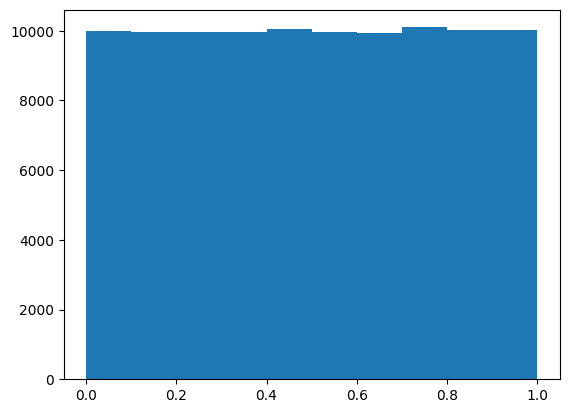

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sabitleri tanımla
a = 75
c = 0
m = (2**31) - 1  # Modül

# Başlangıç değeri (sıfır olmayan herhangi bir başlangıç değeri seçilebilir)
seed = 42  

def uniform_random(n, seed=42):
    """ 'n' adet uniform rastgele sayı üretmek için LCG kullanır. """
    random_numbers = []
    x = seed
    for i in range(n):
        x = (a * x + c) % m  # LCG formülü
        u = x / (m-1)  # [0,1] aralığına ölçekleme
        random_numbers.append(u)
    return np.array(random_numbers)

# 100000 adet rastgele sayı üret ve histogramını çiz
plt.hist(uniform_random(100000), bins=10)
plt.show()


## **Üstel Dağılım ve En Büyük Olabilirlik Tahmini (MLE) ile Parametre Belirleme**

Bu örnekte, **üstel dağılımdan rastgele örnekler üreterek** dağılımın karakteristik parametresi olan **tau ($\tau$)** değerini **En Büyük Olabilirlik Tahmini (Maximum Likelihood Estimation, MLE)** yöntemi ile belirliyoruz. Ayrıca, **log-olabilirlik fonksiyonunu analiz ederek** güven aralığını hesaplıyoruz.

---

## **1. Üstel Dağılım ve Rastgele Örnek Üretimi**

Üstel dağılım, birçok fiziksel ve istatistiksel süreçte yaygın olarak kullanılan bir dağılımdır. **Olaylar arasındaki bekleme sürelerini** modellemek için sıkça kullanılır.

Üstel dağılımın olasılık yoğunluk fonksiyonu (PDF) şu şekilde tanımlanır:

$f(t | \tau) = \frac{1}{\tau} e^{-t / \tau}, \quad t \geq 0
$

Burada:
- $ \tau $ dağılımın parametresidir (ortalama ömür, bekleme süresi vb.).
- Rastgele değişken $ t $ üstel dağılım göstermektedir.
- $\tau$ parametresini 2 olarak seçerek, dağılımın ortalama değerini 2 birim olarak belirliyoruz.

Bir üniform rastgele değişken $ u \sim U(0,1) $ kullanılarak üstel dağılımdan veri üretmek için **ters dönüşüm yöntemi** uygulanır.

---

## **2. Ters Dönüşüm Metodu ile Üstel Dağılımdan Örnek Üretimi**

### **2.1 Üstel Dağılımın Kümülatif Dağılım Fonksiyonu (CDF)**

Üstel dağılımın **kümülatif dağılım fonksiyonu (CDF)** şu şekilde tanımlanır:

$F(t) = P(T \leq t) = 1 - e^{-t / \tau}, \quad t \geq 0
$

Burada **F(t)**, belirli bir $ t $ değerine kadar olan olasılığı verir.

### **2.2 Ters Dönüşüm Metodu (Inverse Transform Sampling)**

Bu yöntemde, **uniform dağılımdan üretilen rastgele bir değişken** $ U \sim U(0,1) $ kullanılarak, $ U $ değeri **CDF'ye eşit olarak kabul edilir**:

$U = F(t) = 1 - e^{-t / \tau}
$

Bu denklemi $ t $ için çözersek:

$ t = -\tau \ln(1 - U)$ buluruz.

Bu formül, **üniform rastgele değişken $ U $ ile üstel dağılımdan rastgele veri üretmek için** kullanılan formüldür.

---

## **3. En Büyük Olabilirlik Tahmini (MLE)**

Bir olasılık dağılımının **parametrelerini tahmin etmek** için en yaygın yöntemlerden biri **En Büyük Olabilirlik Tahmini (MLE)** yöntemidir.

Verilen $ N $ adet $ t $ örneği için **olabilirlik fonksiyonu** şu şekilde tanımlanır:

$L(\tau) = \prod_{i=1}^{N} \frac{1}{\tau} e^{-t_i / \tau}
$

Bunu logaritmaya alarak **log-olabilirlik fonksiyonunu** elde ederiz:

$\log L(\tau) = -N \log \tau - \frac{\sum_{i=1}^{N} t_i}{\tau}
$

Bu fonksiyon **maksimize edilerek** en uygun $ \tau $ değeri bulunur:

$\hat{\tau} = \arg\max_{\tau} \log L(\tau)
$

Kodda, $ \tau $ değerleri **$ [1.5, 2.5] $** aralığında taranarak log-olabilirlik fonksiyonu hesaplanmış ve maksimum değer bulan nokta **MLE tahmini ($\hat{\tau}$)** olarak belirlenmiştir.

---

## **4. Güven Aralığının Belirlenmesi**

**Wilks teoremi** gereği, **log-olabilirlik fonksiyonunun maksimum değerinden 0.5 aşağıda** olan noktalar ile yaklaşık **68% güven aralığı** belirlenir:

$\log L(\tau) \geq \log L(\hat{\tau}) - 0.5
$

Bu koşulu sağlayan **en küçük ve en büyük $ \tau $ değerleri**, sırasıyla **alt ve üst güven sınırları** olarak alınır.

Kodda bu sınırlar hesaplanarak **asimetrik hata tahmini** yapılmıştır.

---



MLE Tau Değeri: 2.144108220541103


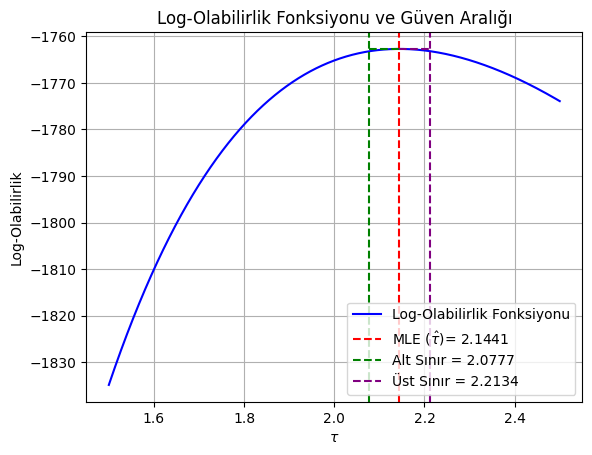

Tau için MLE Tahmini: 2.1441
Asimetrik Alt Hata: -0.0664
Asimetrik Üst Hata: +0.0693
Güven Aralığı: (2.0777, 2.2134)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreler
N = 1000  # Örnek sayısı
true_tau = 2.0  # Gerçek tau değeri

# Üstel dağılımdan N örnek üret
u = np.random.uniform(0, 1, N)
t_values = -true_tau * np.log(1 - u)

# Üstel dağılım için log-olabilirlik fonksiyonunu tanımla
def log_likelihood(tau, t_values):
    N = len(t_values)
    return -N * np.log(tau) - np.sum(t_values) / tau

# Olasılık tahmini için tau değer aralığını belirle
tau_values = np.linspace(1.5, 2.5, 200000)
log_likelihood_values = np.array([log_likelihood(tau, t_values) for tau in tau_values])

# Tau için En Büyük Olabilirlik Tahmini (MLE) hesapla
# Log-olabilirlik fonksiyonunu maksimize eden tau değeri
mle_tau = tau_values[np.argmax(log_likelihood_values)] 
print(f"MLE Tau Değeri: {mle_tau}")

# Maksimum log-olabilirlik değeri
logL_max = log_likelihood(mle_tau, t_values)

# Güven aralığı eşiği: log-olabilirlik koşulu
threshold = logL_max - 0.5

# Eşiği sağlayan alt ve üst tau değerlerini bul
lower_tau = tau_values[log_likelihood_values >= threshold][0]
upper_tau = tau_values[log_likelihood_values >= threshold][-1]

# Asimetrik hataları hesapla
lower_error = mle_tau - lower_tau
upper_error = upper_tau - mle_tau

# Log-olabilirlik fonksiyonunu çiz
plt.plot(tau_values, log_likelihood_values, label="Log-Olabilirlik Fonksiyonu", color='blue')
plt.axvline(mle_tau, color='red', linestyle='--', label=r"MLE ($\hat{{\tau}}$)" + f"= {mle_tau:.4f}")
plt.axvline(lower_tau, color='green', linestyle='--', label=f"Alt Sınır = {lower_tau:.4f}")
plt.axvline(upper_tau, color='purple', linestyle='--', label=f"Üst Sınır = {upper_tau:.4f}")
plt.xlabel(r'$\tau$ ')
plt.ylabel('Log-Olabilirlik')
plt.title('Log-Olabilirlik Fonksiyonu ve Güven Aralığı')

# MLE'den alt ve üst sınırlara yatay kesikli çizgiler ekle
plt.hlines(y=log_likelihood(mle_tau, t_values), xmin=lower_tau, xmax=mle_tau, color='green', linestyle='dashed')
plt.hlines(y=log_likelihood(mle_tau, t_values), xmin=mle_tau, xmax=upper_tau, color='purple', linestyle='dashed')

plt.legend(loc="best")
plt.grid()
plt.show()

# Sonuçları yazdır
print(f"Tau için MLE Tahmini: {mle_tau:.4f}")
print(f"Asimetrik Alt Hata: -{lower_error:.4f}")
print(f"Asimetrik Üst Hata: +{upper_error:.4f}")
print(f"Güven Aralığı: ({lower_tau:.4f}, {upper_tau:.4f})")


# **Monte Carlo Yöntemi ile İntegrasyon:**

## **1. Giriş**
Monte Carlo entegrasyonu, analitik olarak çözülemeyen ya da hesaplanması zor olan belirli integralleri yaklaşık olarak hesaplamak için kullanılan stokastik bir yöntemdir. Bu yöntem, özellikle fizik, finans ve mühendislik gibi alanlarda sıkça kullanılır.

Monte Carlo yöntemleri, integral değerlerini tahmin etmek için rastgele örneklemeye dayanır. Geleneksel sayısal yöntemler (örneğin Riemann toplamları veya trapezoidal yöntem) yerine, bu teknik olasılık teorisini kullanarak yaklaşık çözümler üretir.

## **2. Matematiksel Temeller**

Bir fonksiyonun belirli bir aralıkta integrali şu şekilde tanımlanır:

$I = \int_a^b f(x) \, dx$

Monte Carlo entegrasyonu, bu integrali rastgele noktalar kullanarak yaklaşık olarak hesaplar.

### **2.1 Uniform (Eşit Dağılımlı) Örnekleme**
Basit bir Monte Carlo entegrasyon yöntemi, integralin alındığı aralıktan eşit olasılıkla rastgele noktalar seçmektir. Eğer $ x_i $ bağımsız olarak $ U(a, b) $ dağılımından örneklenirse, integral şu şekilde yaklaşık olarak hesaplanabilir:

$I \approx (b - a) \cdot \frac{1}{N} \sum_{i=1}^{N} f(x_i)$

Burada $ N $, örnek sayısını ifade eder.

Bu yöntem, fonksiyon $ f(x) $ düzgün bir şekilde değiştiğinde iyi çalışır. Ancak, eğer fonksiyonun keskin değişimleri varsa, tahminde yüksek varyansa yol açabilir.

### **2.2 Önem Örneklemesi (Importance Sampling)**
Daha verimli bir yöntem olarak **önem örneklemesi**, rastgele noktaların fonksiyon $ f(x) $’i daha iyi temsil eden bir dağılımdan seçilmesini içerir. Böylece integral şu şekilde yeniden yazılır:

$I = \int_a^b f(x) \frac{q(x)}{q(x)} dx = \mathbb{E}_{q} \left[ \frac{f(x)}{q(x)} \right]$

Burada $ q(x) $, uygun şekilde seçilmiş bir **olasılık yoğunluk fonksiyonudur (PDF)**.

Monte Carlo tahmini şu şekilde yapılır:

$I \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{q(x_i)}$

Burada $ x_i $, $ q(x) $ dağılımından çekilen rastgele örneklerdir. **Önemli bölgelerde daha fazla örnekleme yapmak**, tahminin doğruluğunu artırır ve varyansı azaltır.

### **2.3 Uygun Önem Örnekleme Dağılımı Seçimi**
İyi bir **önem örnekleme fonksiyonu $ q(x) $:**
- **$ f(x) $’in şeklini iyi bir şekilde takip etmeli** (örneğin, $ f(x) $’in büyüklüğü ile orantılı olmalı).
- **Kolay örneklenebilir olmalı** (örneğin, üçgen ya da normal dağılım gibi).
- **Olasılık yoğunluk fonksiyonu (PDF) normalleştirilebilir olmalı**.

Örneğin, eğer $ f(x) $ yaklaşık olarak $ x^2 $ ile orantılıysa, $ q(x) $’in de benzer bir dağılımda olması tahmini iyileştirir.

## **3. Kod Uygulaması**
Aşağıdaki Python kodunda:
- **Uniform örnekleme** `np.random.uniform(a, b, n)` fonksiyonu ile uygulanmıştır.
- **Önem örneklemesi**, `np.random.triangular(a, (a + b) / 2, b, n)` üçgen dağılımından örnekleme yapılarak gerçekleştirilmiştir.

Kod, şu fonksiyonun integralini hesaplamaktadır:

$f(x) = \frac{x^2 - 1}{x + 5}$

Aralık **[2,7]** olarak seçilmiş ve iki yöntemle integral tahmini yapılmıştır.

## **4. Sonuç**
Monte Carlo entegrasyonu, yüksek boyutlu integral problemlerinde oldukça etkili bir yöntemdir. **Uniform örnekleme** temel ve kolay bir yöntemdir, ancak **önem örneklemesi (importance sampling)** daha verimli olup daha hızlı ve düşük varyanslı sonuçlar üretir.

Bu yöntem özellikle:
- **Fiziksel simülasyonlar** (örneğin kuantum hesaplamaları)
- **Makine öğrenmesi** (örneğin Bayes çıkarımı)
- **Finans** (örneğin opsiyon fiyatlandırması)

gibi alanlarda yaygın olarak kullanılmaktadır.

Anahtar nokta, uygun bir $ q(x) $ seçiminin **hata oranını düşürmesi** ve **daha hızlı yakınsama sağlamasıdır**.

---


Monte Carlo (Uniform Örnekleme) Tahmini: 10.33790608025187
Monte Carlo (Önem Örnekleme) Tahmini: 9.948749666916552
Gerçek İntegral Sonucu: 10.435916017584487


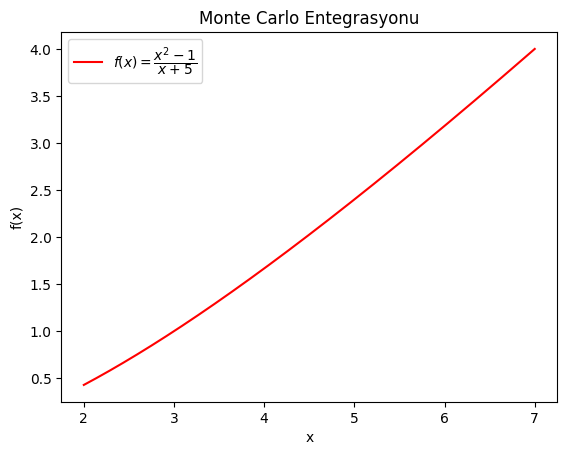

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi


# Entegralini alacağımız fonksiyon
def f(x):
    return (x**2 - 1) / (x + 5)

# Monte Carlo entegrasyonu (uniform örnekleme kullanarak)
def monte_carlo_uniform(f, a, b, n):
    x = np.random.uniform(a, b, n)  # [a, b] aralığında uniform rastgele sayılar üret
    fx = f(x)  # Fonksiyon değerlerini hesapla
    integral = (b - a) * np.mean(fx)  # Ortalama ile integral tahmini yap
    return integral

# Monte Carlo entegrasyonu (önem örnekleme kullanarak)
def monte_carlo_importance(f, p, q_sample, n):
    x = q_sample(n)  # Önem örnekleme dağılımından rastgele sayılar üret
    fx = f(x) / p(x)  # Ağırlıklı fonksiyon değerlerini hesapla
    integral = np.mean(fx)  # Ortalama ile integral tahmini yap
    return integral

# Parametreler
a, b = 2, 7  # Entegrasyon sınırları
n_samples = 1000  # Örnek sayısı

# Uniform örnekleme kullanarak integral hesapla
mc_uniform_result = monte_carlo_uniform(f, a, b, n_samples)
print(f"Monte Carlo (Uniform Örnekleme) Tahmini: {mc_uniform_result}")

# Daha iyi bir önem örnekleme dağılımı q(x) tanımla
# q(x) ∝ |f(x)| şeklinde seçilir, ancak toplamı 1 olacak şekilde normalize edilir.
def p(x):
    return (x + 5) / (b**2 / 2 - a**2 / 2 + 5 * (b - a))  # Normalize edilmiş olasılık yoğunluk fonksiyonu (PDF)

def q_sample(n):
    return np.random.triangular(a, (a + b) / 2, b, n)  # Üçgensel dağılımdan örnekleme yap

# Önem örnekleme kullanarak integral hesapla
mc_importance_result = monte_carlo_importance(f, p, q_sample, n_samples)
print(f"Monte Carlo (Önem Örnekleme) Tahmini: {mc_importance_result}")

# Klasik yöntemle (Scipy) entegrasyonu gerçekleştir
result, error = spi.quad(f, a, b)

print(f"Gerçek İntegral Sonucu: {result}")

# Fonksiyonun grafiğini ve örneklenen noktaları çiz
x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, 'r-', label=r'$f(x) =\dfrac{x^2 - 1}{x + 5}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Monte Carlo Entegrasyonu')
plt.legend()
plt.show()


## **Monte Carlo Yöntemi ile π Sayısının Tahmini**

Bu örnekte Monte Carlo yöntemi kullanarak π sayısını tahmin etme yöntemini ele alacağız. 

---


## **Problemin Tanımı**  

Bir **birim çemberin** (yarıçapı 1 olan çember) birim kare içinde bulunan çeyrek dairesini (1. bölgede yer alan kısmını) ele alalım:

- **Birim kare**: $ [0,1] \times [0,1] $ aralığında rastgele noktalar üretilir.
- **Çeyrek çemberin içindeki noktalar**:
  
  $x^2 + y^2 \leq 1$
  
  eşitsizliğini sağlayan noktalar, çeyrek çemberin içinde yer alır.

Monte Carlo yöntemiyle şu mantığı kullanarak π'yi tahmin edebiliriz:

1. Birim kare içinde rastgele noktalar üretelim.
2. Bu noktaların kaç tanesinin çeyrek çember içine düştüğünü sayalım.
3. Çeyrek çember içindeki noktaların toplam noktalara oranı şu şekilde hesaplanır:

   $
   \frac{\text{çeyrek çember içindeki nokta sayısı}}{\text{toplam nokta sayısı}} \approx \frac{\pi}{4}
   $

4. Buradan, π için bir tahmin yapabiliriz:

   $
   \pi \approx 4 \times \frac{\text{çeyrek çember içindeki nokta sayısı}}{\text{toplam nokta sayısı}}
   $

---

## **Simülasyonun Adımları**  

Monte Carlo simülasyonu aşağıdaki adımlardan oluşur:

1. **Nokta üretimi**: $ (x,y) $ koordinatlarını 0 ile 1 arasında rastgele üret.

2. **Kontrol**: Eğer $ x^2 + y^2 \leq 1 $ ise nokta çeyrek çemberin içindedir.

3. **İstatistik**: Çeyrek çember içindeki noktaları sayarak yukarıdaki formülü uygula.

4. **Görselleştirme**: 
   - Çeyrek çember içindeki noktalar **kırmızı (red)** ile gösterilir.
   - Çeyrek çember dışındaki noktalar **mavi (blue)** ile gösterilir.

---

3.144

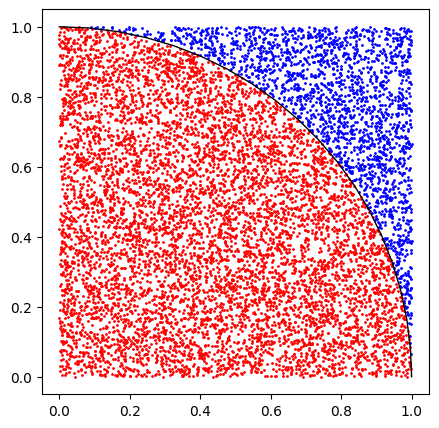

In [4]:
def nokta_olustur():
    x = np.random.uniform(0,1) 
    y = np.random.uniform(0,1)
    return x**2 + y**2 <= 1, x, y

def pi_tahmin(n, show_plot=False):   
    n_in = 0
    x_vals_in = []
    y_vals_in = []
    x_vals_out = []
    y_vals_out = []

    for _ in range(n):
        is_in, x, y = nokta_olustur()
        if is_in:
            x_vals_in.append(x)
            y_vals_in.append(y)
        else:
            x_vals_out.append(x)
            y_vals_out.append(y)    
        n_in += int(is_in)
    
    if show_plot:
        plt.scatter(x_vals_in, y_vals_in, color='red', s=1)
        plt.scatter(x_vals_out, y_vals_out, color='blue', s=1)
        

        theta = np.linspace(0, np.pi/2, 20)
        x_circle = np.cos(theta)
        y_circle = np.sin(theta)
        plt.plot(x_circle, y_circle, color="black", linewidth=1, label="Quarter Circle")


    return (4*n_in/n)

plt.rcParams["figure.figsize"] = (5, 5)
pi_tahmin(10000, show_plot=True)

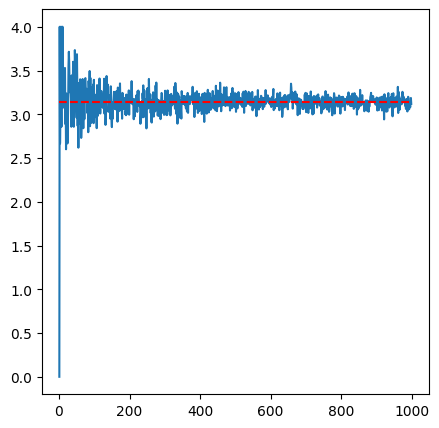

In [5]:
x = []
y = []
N =1000 

for i in range(1, N):
    x.append(i)
    y.append(pi_tahmin(i))

plt.plot(x,y)
plt.hlines(np.pi, 1, N, color='red', linestyles='dashed')

"Hit and Miss" yöntemi ile yukarıda incelediğimiz $\dfrac{x^2-1}{x+5}$ fonksiyonun da integralini alabiliriz.

Monte Carlo (Uniform Örnekleme) Tahmini: 10.489505348254898
Monte Carlo (Önem Örnekleme) Tahmini: 9.910199214339558
Monte Carlo (Hit-and-Miss) Tahmini: 10.06
Gerçek İntegral Sonucu: 10.435916017584487


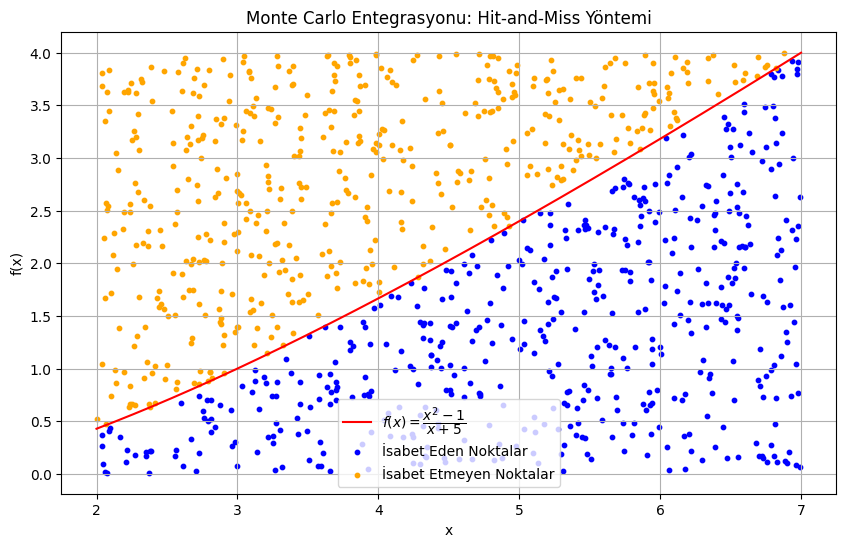

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

# Entegralini alacağımız fonksiyon
def f(x):
    return (x**2 - 1) / (x + 5)

# Monte Carlo entegrasyonu (uniform örnekleme kullanarak)
def monte_carlo_uniform(f, a, b, n):
    x = np.random.uniform(a, b, n)  # [a, b] aralığında uniform rastgele sayılar üret
    fx = f(x)  # Fonksiyon değerlerini hesapla
    integral = (b - a) * np.mean(fx)  # Ortalama ile integral tahmini yap
    return integral

# Monte Carlo entegrasyonu (önem örnekleme kullanarak)
def monte_carlo_importance(f, p, q_sample, n):
    x = q_sample(n)  # Önem örnekleme dağılımından rastgele sayılar üret
    fx = f(x) / p(x)  # Ağırlıklı fonksiyon değerlerini hesapla
    integral = np.mean(fx)  # Ortalama ile integral tahmini yap
    return integral

# Monte Carlo entegrasyonu (Hit-and-Miss yöntemi)
def monte_carlo_hit_and_miss(f, a, b, n):
    x_random = np.random.uniform(a, b, n)  # [a, b] aralığında x rastgele sayılar üret
    f_max = np.max(f(np.linspace(a, b, 1000)))  # Fonksiyonun maksimum değerini bul
    y_random = np.random.uniform(0, f_max, n)  # [0, f_max] aralığında y rastgele sayılar üret

    hits = y_random <= f(x_random)  # Fonksiyonun altında kalan noktalar (isabet edenler)
    misses = ~hits  # Fonksiyonun üstünde kalan noktalar (isabet etmeyenler)

    # Hit-and-Miss yöntemiyle integral tahmini
    integral = (b - a) * f_max * np.sum(hits) / n
    return integral, x_random, y_random, hits, misses

# Parametreler
a, b = 2, 7  # Entegrasyon sınırları
n_samples = 1000  # Örnek sayısı

# Uniform örnekleme kullanarak integral hesapla
mc_uniform_result = monte_carlo_uniform(f, a, b, n_samples)
print(f"Monte Carlo (Uniform Örnekleme) Tahmini: {mc_uniform_result}")

# Daha iyi bir önem örnekleme dağılımı q(x) tanımla
def p(x):
    return (x + 5) / (b**2 / 2 - a**2 / 2 + 5 * (b - a))  # Normalize edilmiş olasılık yoğunluk fonksiyonu (PDF)

def q_sample(n):
    return np.random.triangular(a, (a + b) / 2, b, n)  # Üçgensel dağılımdan örnekleme yap

# Önem örnekleme kullanarak integral hesapla
mc_importance_result = monte_carlo_importance(f, p, q_sample, n_samples)
print(f"Monte Carlo (Önem Örnekleme) Tahmini: {mc_importance_result}")

# Hit-and-Miss yöntemiyle integral hesapla
mc_hit_miss_result, x_rand, y_rand, hits, misses = monte_carlo_hit_and_miss(f, a, b, n_samples)
print(f"Monte Carlo (Hit-and-Miss) Tahmini: {mc_hit_miss_result}")

# Klasik yöntemle (Scipy) entegrasyonu gerçekleştir
result, error = spi.quad(f, a, b)
print(f"Gerçek İntegral Sonucu: {result}")

# Fonksiyonun grafiğini ve örneklenen noktaları çiz
x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))

# Fonksiyon eğrisini çiz
plt.plot(x_vals, y_vals, 'r-', label=r'$f(x) =\dfrac{x^2 - 1}{x + 5}$')

# Hit (isabet eden) noktaları mavi ile çiz
plt.scatter(x_rand[hits], y_rand[hits], color='blue', s=10, label="İsabet Eden Noktalar")

# Miss (isabet etmeyen) noktaları turuncu ile çiz
plt.scatter(x_rand[misses], y_rand[misses], color='orange', s=10, label="İsabet Etmeyen Noktalar")

# Grafik detayları
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Monte Carlo Entegrasyonu: Hit-and-Miss Yöntemi')
plt.legend()
plt.grid()
plt.show()
